# World population analysis

In [152]:
import pandas as pd
wpa= pd.read_csv(r"C:\Users\ajay a j\Downloads\archive (9)\worldpopulationreview.csv")

In [153]:
wpa.shape

(234, 9)

In [154]:
#there are 234 entries across 9 columns

In [155]:
wpa.head(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,"1,436,397,893","1,428,627,663",3.3M,3M,485,0.92%,18.01%,1
1,China,"1,425,436,213","1,425,671,352",9.7M,9.4M,151,-0.03%,17.8%,2
2,United States,"341,075,762","339,996,563",9.4M,9.1M,37,0.53%,4.27%,3
3,Indonesia,"278,883,459","277,534,122",1.9M,1.9M,149,0.82%,3.5%,4
4,Pakistan,"243,270,676","240,485,658",881.9K,770.9K,318,1.96%,3.06%,5
5,Nigeria,"226,941,418","223,804,632",923.8K,910.8K,252,2.39%,2.86%,6
6,Brazil,"217,149,602","216,422,446",8.5M,8.4M,26,0.56%,2.72%,7
7,Bangladesh,"173,989,719","172,954,319",147.6K,130.2K,"1,342",1.01%,2.18%,8
8,Russia,"144,152,416","144,444,359",17.1M,16.4M,9,-0.34%,1.8%,9
9,Ethiopia,"128,405,399","126,527,060",1.1M,1.1M,115,2.52%,1.62%,10


#explore the datatypes
wpa.dtypes

In [156]:
#All the numericals were taken as object datatypes except rank
# we should change all the datatypes

wpa["Population (Jan 2024)"] = wpa["Population (Jan 2024)"].str.replace(',', '').astype(float)

In [157]:
wpa["Population(2023)"] = wpa["Population(2023)"].str.replace(',', '').astype(float)

In [158]:
wpa["Density(/Km)"] = wpa["Density(/Km)"].str.replace(',', '').astype(float)


 for area and land area we need to define a function and change the dataype

def convert_to_int(value):
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return int(float(value.replace('M', '')) * 1000000)
    else:
        return int(value)

wpa['Area(km)'] = wpa['Area(km)'].fillna('').apply(convert_to_int)


 oho erorr ! erorr ! erorr !

In [159]:
# the values might contain string like "<1" which means less than 1 , so we will just replace it with some default value less than one

In [160]:
import pandas as pd

def convert_to_float(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif '<' in value:
        return 0.5 
        try:
            return float(value)
        except ValueError:
            return None 


wpa['Area(km)'] = wpa['Area(km)'].apply(convert_to_float)

In [161]:
# first we will check if land area contains values like "<1" then we will proceed with chaanging data types


In [162]:
check_LA = wpa['Land Area (Km)'].str.contains('<*',na=False)
print('check_LA')

check_LA


In [163]:

wpa['Land Area (Km)'] = wpa['Land Area (Km)'].apply(convert_to_float)

In [164]:
# we will just convert the "growth rate" and "world" which are in str to percenatge

In [165]:
wpa['Growth Rate'] = wpa['Growth Rate'].str.rstrip('%').astype('float') 
# it will replace the % 


In [166]:
wpa['World%'] = wpa['World%'].str.rstrip('%').astype('float') 

In [167]:
#check the datatypes now

wpa.dtypes

Country Name              object
Population (Jan 2024)    float64
Population(2023)         float64
Area(km)                 float64
Land Area (Km)           float64
Density(/Km)             float64
Growth Rate              float64
World%                   float64
Rank                       int64
dtype: object

In [168]:
# All are changed , now we can  begin with statistical analysis
# for that we will use describe() 
wpa.describe()

,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
count,2.240000e+02,2.340000e+02,1.840000e+02,1.840000e+02,234.000000,232.000000,177.000000,234.000000
mean,3.609288e+07,3.437442e+07,7.390701e+05,7.087647e+05,453.788248,0.927974,0.572768,117.500000
std,1.406560e+08,1.373864e+08,1.959063e+06,1.879849e+06,1990.163274,1.138805,1.964105,67.694165
min,1.935000e+03,5.180000e+02,5.000000e-01,5.000000e-01,0.140000,-3.090000,0.010000,1.000000
25%,6.261740e+05,4.225982e+05,3.552500e+04,3.227500e+04,39.500000,0.200000,0.040000,59.250000
50%,6.285490e+06,5.643895e+06,1.637000e+05,1.557000e+05,98.500000,0.800000,0.130000,117.500000
75%,2.450796e+07,2.324537e+07,5.832500e+05,5.673000e+05,248.250000,1.577500,0.440000,175.750000
max,1.436398e+09,1.428628e+09,1.710000e+07,1.640000e+07,21674.000000,4.830000,18.010000,234.000000


In [169]:
# check for duplicates
wpa.drop_duplicates()

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,1.436398e+09,1.428628e+09,3300000.0,3000000.0,485.00,0.92,18.01,1
1,China,1.425436e+09,1.425671e+09,9700000.0,9400000.0,151.00,-0.03,17.80,2
2,United States,3.410758e+08,3.399966e+08,9400000.0,9100000.0,37.00,0.53,4.27,3
3,Indonesia,2.788835e+08,2.775341e+08,1900000.0,1900000.0,149.00,0.82,3.50,4
4,Pakistan,2.432707e+08,2.404857e+08,881900.0,770900.0,318.00,1.96,3.06,5
...,...,...,...,...,...,...,...,...,...
229,Montserrat,NaN,4.386000e+03,NaN,NaN,43.00,-0.32,NaN,230
230,Falkland Islands,NaN,3.791000e+03,12200.0,12200.0,0.31,0.32,NaN,231
231,Niue,1.935000e+03,1.935000e+03,NaN,NaN,7.00,NaN,NaN,232
232,Tokelau,NaN,1.893000e+03,NaN,NaN,192.00,1.16,NaN,233


there are no dupliates present

### check for missing values

In [170]:
wpa.isnull().sum()

Country Name              0
Population (Jan 2024)    10
Population(2023)          0
Area(km)                 50
Land Area (Km)           50
Density(/Km)              0
Growth Rate               2
World%                   57
Rank                      0
dtype: int64

<Axes: >

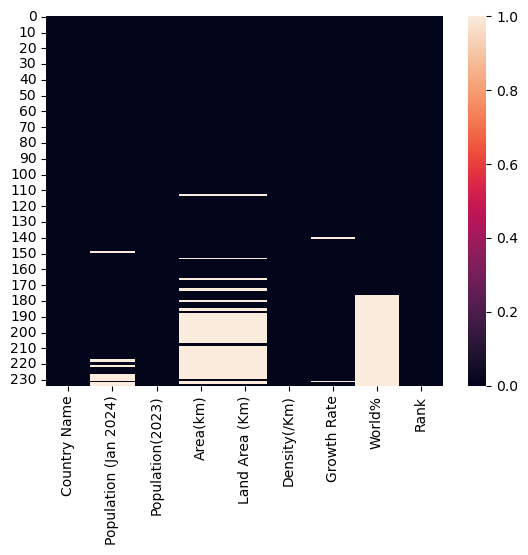

In [171]:
# 5 values are miussing values, we can delete the columns having missing values more than 50 but we may lose some impt information 
# so it's better to go with imputing 
# check with heatmap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.heatmap(wpa.isnull())


In [172]:
wpa['Country Name'].duplicated().sum()

0

In [173]:
wpa['Country Name'].count()

234

In [174]:
# no country is repeated 


### missing values imputation

In [175]:
# all are numerical so will go with mean
wpa['Land Area (Km)']=wpa['Land Area (Km)'].fillna(wpa['Land Area (Km)'].mean())

In [176]:
wpa['Population (Jan 2024)']=wpa['Population (Jan 2024)'].fillna(wpa['Population (Jan 2024)'].mean())
wpa['Area(km)']=wpa['Area(km)'].fillna(wpa['Area(km)'].mean())
wpa['Growth Rate']=wpa['Growth Rate'].fillna(wpa['Growth Rate'].mean())
wpa['World%']=wpa['World%'].fillna(wpa['World%'].mean())

In [177]:
wpa.isnull().sum()

Country Name             0
Population (Jan 2024)    0
Population(2023)         0
Area(km)                 0
Land Area (Km)           0
Density(/Km)             0
Growth Rate              0
World%                   0
Rank                     0
dtype: int64

<Axes: >

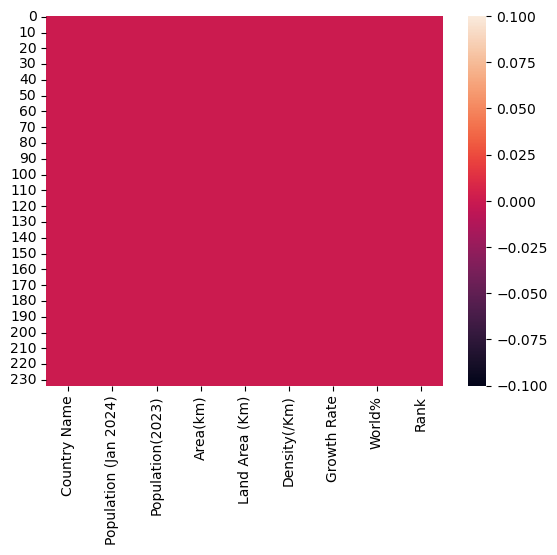

In [178]:
sns.heatmap(wpa.isnull())

### :) let's begin with Descriptive analysis (statistical measure , visualization)

In [179]:
# Measures of central tendency
wpa['Population (Jan 2024)'].mean()

36092880.491071425

In [180]:
wpa['Population (Jan 2024)'].mode()

0    3.609288e+07
Name: Population (Jan 2024), dtype: float64

In [181]:
wpa['Population (Jan 2024)'].median()

6922746.0

In [182]:
# meaures of dispersion

In [183]:
#std dev
wpa['Population (Jan 2024)'].std()

137604556.65871143

In [184]:
# std dev indicates larger variability

In [185]:
#measure of symmetry (skewness)
wpa['Population (Jan 2024)'].skew()

9.129310446463348

In [186]:
# it is a positive skewness 

In [187]:
#measure of tailedness(kurtosis)
wpa['Population (Jan 2024)'].kurt()

90.16647365292415

C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\4181729334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wpa['Population (Jan 2024)'],bins=10,color='Green')


Text(0.5, 1.0, 'Histogram of Population(Jan 2024)')

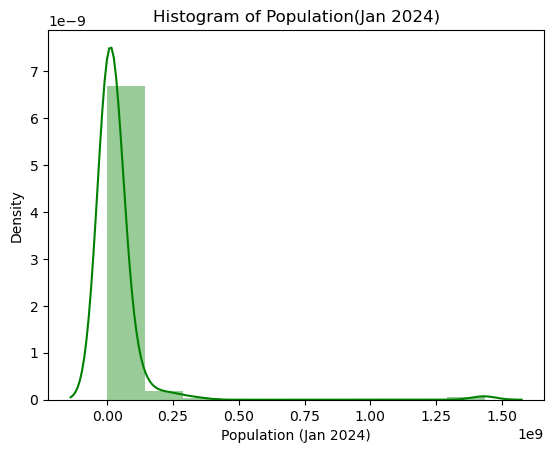

In [188]:
sns.distplot(wpa['Population (Jan 2024)'],bins=10,color='Green')
plt.title('Histogram of Population(Jan 2024)')

 median is greater than mean suggests that there are some lower-than-average values pulling the mean down and the skewness to the right, with a tail extending towards the lower values

In [189]:
# check for Population(2023)
mean_23 = wpa['Population(2023)'].mean()
mode_23 = wpa['Population(2023)'].mode()
median_23 =wpa['Population(2023)'].median()

print("mean is:",mean_23)
print("median is:",median_23)
print("mode is:",mode_23)


mean is: 34374424.743589744
median is: 5643895.0
mode is: 0      5.180000e+02
1      1.893000e+03
2      1.935000e+03
3      3.791000e+03
4      4.386000e+03
           ...     
229    2.404857e+08
230    2.775341e+08
231    3.399966e+08
232    1.425671e+09
233    1.428628e+09
Name: Population(2023), Length: 234, dtype: float64


C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\2241417642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wpa['Population(2023)'],bins=10,color='red')


Text(0.5, 1.0, 'Histogram of Population(2023) ')

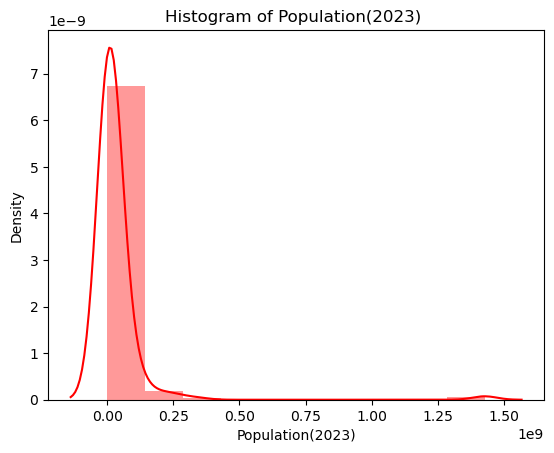

In [190]:
sns.distplot(wpa['Population(2023)'],bins=10,color='red')
plt.title('Histogram of Population(2023) ')

In [191]:
# it is right skewed (positive skew)

In [192]:
mean_den = wpa['Density(/Km)'].mean()
mode_den = wpa['Density(/Km)'].mode()
median_den =wpa['Density(/Km)'].median()

print("mean is:",mean_den)
print("median is:",median_den)
print("mode is:",mode_den)

mean is: 453.7882478632479
median is: 98.5
mode is: 0    4.0
Name: Density(/Km), dtype: float64


In [193]:
# meaures of dispersion
std_den = wpa['Density(/Km)'].std()
#measure of symmetry
skew_den = wpa['Density(/Km)'].skew()
#meausre if tailedness
kurt_den =wpa['Density(/Km)'].kurt()

print("std dev is:",std_den)
print("skewness is:",skew_den)
print("kurtosis is:",kurt_den)

std dev is: 1990.1632743243576
skewness is: 8.742454948493274
kurtosis is: 82.77470407574563


it has larger variability with positively skewed and has high tail with some outliers

C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\42522538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wpa['Density(/Km)'],bins=50,color='cyan')


Text(0.5, 1.0, 'Histogram of desnity/km')

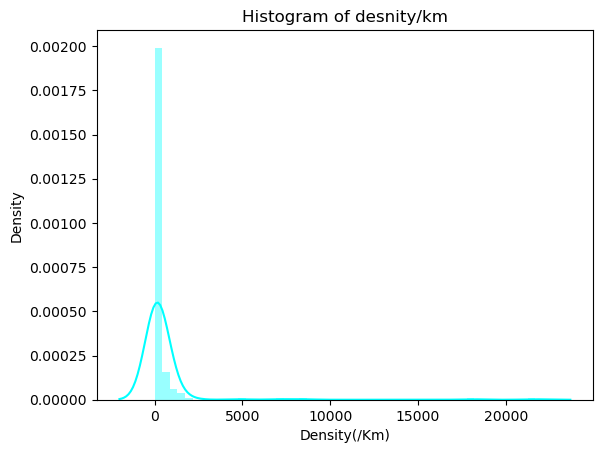

In [194]:
sns.distplot(wpa['Density(/Km)'],bins=50,color='cyan')
plt.title('Histogram of desnity/km')

The mean is significantly higher than the median, suggesting a positively skewed distribution. There might be a few very high values pulling the mean to the right.

Text(0.5, 1.0, 'boxplot of density/km')

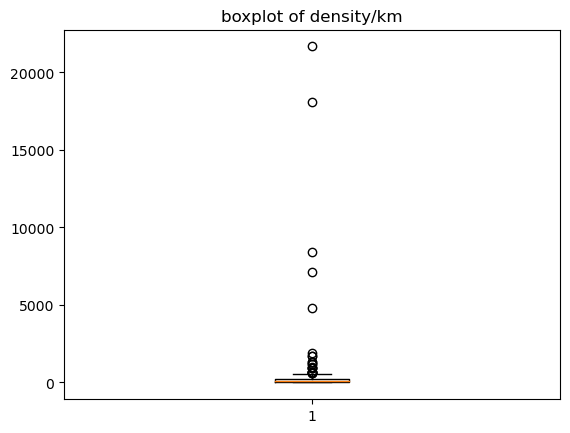

In [195]:
# given the there might be lots of outliers, let's check for it
plt.boxplot(wpa['Density(/Km)'])
plt.title('boxplot of density/km')

In [196]:
# As expected the column is filled with ourtliers
# We will deal with them later on 

In [197]:

mean_gr = wpa['Growth Rate'].mean()
mode_gr = wpa['Growth Rate'].mode()
median_gr =wpa['Growth Rate'].median()

print("mean is:",mean_gr)
print("median is:",median_gr)
print("mode is:",mode_gr)

mean is: 0.9279741379310347
median is: 0.805
mode is: 0    0.63
1    0.71
Name: Growth Rate, dtype: float64


In [198]:
# meaures of dispersion
std_gr = wpa['Growth Rate'].std()
#measure of symmetry
skew_gr = wpa['Growth Rate'].skew()
#meausre if tailedness
kurt_gr =wpa['Growth Rate'].kurt()

print("std dev is:",std_gr)
print("skewness is:",skew_gr)
print("kurtosis is:",kurt_gr)

std dev is: 1.1339068923574553
skewness is: 0.08571793060891046
kurtosis is: 0.7690929739094146


It is basically normally distributed from the values considered

C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\2715619680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wpa['Growth Rate'],bins=10,color='Blue')


Text(0.5, 1.0, 'Histogram of growth rate')

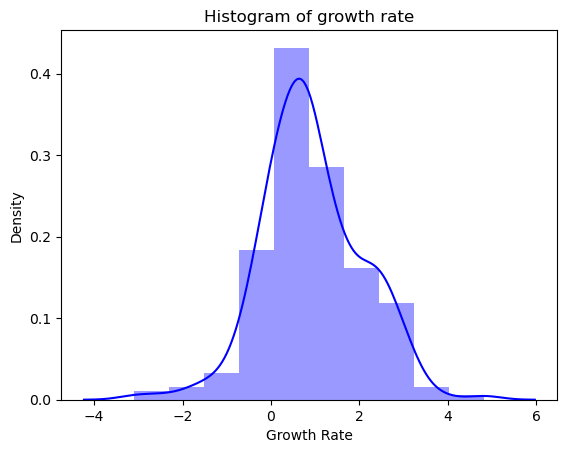

In [199]:
sns.distplot(wpa['Growth Rate'],bins=10,color='Blue')
plt.title('Histogram of growth rate')

Growth rate is right skewed( positive skewed) as the skewness indicates that there are some higher values that are pulling the mean to the right

In [200]:
wpa.head(5)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,1.436398e+09,1.428628e+09,3300000.0,3000000.0,485.0,0.92,18.01,1
1,China,1.425436e+09,1.425671e+09,9700000.0,9400000.0,151.0,-0.03,17.80,2
2,United States,3.410758e+08,3.399966e+08,9400000.0,9100000.0,37.0,0.53,4.27,3
3,Indonesia,2.788835e+08,2.775341e+08,1900000.0,1900000.0,149.0,0.82,3.50,4
4,Pakistan,2.432707e+08,2.404857e+08,881900.0,770900.0,318.0,1.96,3.06,5


In [201]:
mean_wd = wpa['World%'].mean()
mode_wd = wpa['World%'].mode()
median_wd =wpa['World%'].median()

print("mean is:",mean_wd)
print("median is:",median_wd)
print("mode is:",mode_wd)

mean is: 0.5727683615819208
median is: 0.28500000000000003
mode is: 0    0.572768
Name: World%, dtype: float64


In [202]:
# meaures of dispersion
std_wd = wpa['World%'].std()
#measure of symmetry
skew_wd = wpa['World%'].skew()
#meausre if tailedness
kurt_wd =wpa['World%'].kurt()

print("std dev is:",std_wd)
print("skewness is:",skew_wd)
print("kurtosis is:",kurt_wd)

std dev is: 1.707037369701434
skewness is: 9.159287637043782
kurtosis is: 90.77876911776498


C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\1476523297.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wpa['World%'],bins=10,color='Magenta')


Text(0.5, 1.0, 'Histogram of world%')

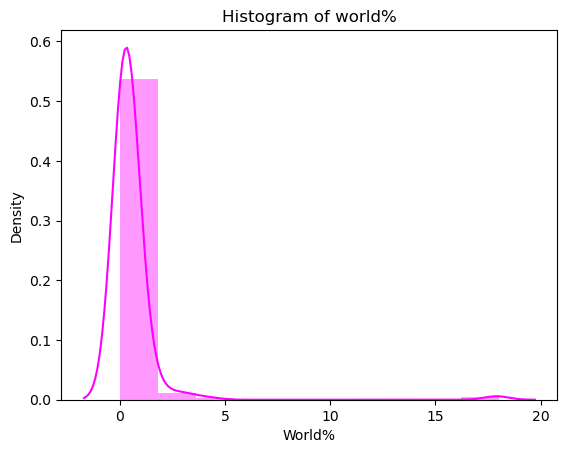

In [203]:
sns.distplot(wpa['World%'],bins=10,color='Magenta')
plt.title('Histogram of world%')

By looking at the data u can tell that area and land area are correlated and have quite similar values,  let's check the correlation between them

In [204]:
wpa[['Area(km)','Land Area (Km)']].corr()

,Area(km),Land Area (Km)
Area(km),1.000000,0.997249
Land Area (Km),0.997249,1.000000


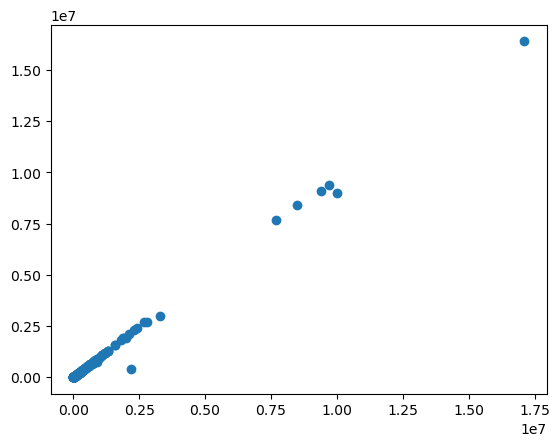

In [205]:
plt.scatter(x=wpa['Area(km)'],y=wpa['Land Area (Km)'])

it has a strong correlation, we might consider keeping one

In [206]:
wpa.drop('Land Area (Km)',axis=1,inplace=True)

In [207]:
wpa.head(2)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,Rank
0,India,1.436398e+09,1.428628e+09,3300000.0,485.0,0.92,18.01,1
1,China,1.425436e+09,1.425671e+09,9700000.0,151.0,-0.03,17.80,2


land area km column is dropped

we can also drop the Rank column as it shows rank of countries just like index and its not useful for analysis

In [208]:
wpa.drop('Rank',axis=1,inplace=True)
wpa.head(2)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%
0,India,1.436398e+09,1.428628e+09,3300000.0,485.0,0.92,18.01
1,China,1.425436e+09,1.425671e+09,9700000.0,151.0,-0.03,17.80


In [209]:
# there's no use of treating outliers as the data has the values that are approx

In [210]:
wpa.corr()

C:\Users\ajay a j\AppData\Local\Temp\ipykernel_17680\2658826410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wpa.corr()


,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%
Population (Jan 2024),1.000000,0.998607,0.435359,-0.024967,-0.008275,0.990881
Population(2023),0.998607,1.000000,0.436764,-0.026480,-0.002748,0.989871
Area(km),0.435359,0.436764,1.000000,-0.019658,-0.029647,0.434939
Density(/Km),-0.024967,-0.026480,-0.019658,1.000000,-0.072809,-0.016674
Growth Rate,-0.008275,-0.002748,-0.029647,-0.072809,1.000000,-0.028007
World%,0.990881,0.989871,0.434939,-0.016674,-0.028007,1.000000


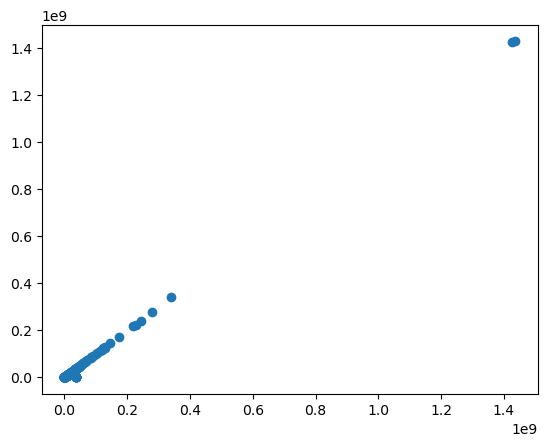

In [211]:
# scatter plot , derive relation between two population columns
plt.scatter(x=wpa['Population (Jan 2024)'],y=wpa['Population(2023)'])

In [212]:
#thought of creating a new column whcih shows difference between "populaton(2024)" and "populaton(2023)" let's give it a try
wpa['population_diff']  = wpa['Population (Jan 2024)']-wpa['Population(2023)']

In [213]:
wpa.head(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,population_diff
0,India,1.436398e+09,1.428628e+09,3300000.0,485.0,0.92,18.01,7770230.0
1,China,1.425436e+09,1.425671e+09,9700000.0,151.0,-0.03,17.80,-235139.0
2,United States,3.410758e+08,3.399966e+08,9400000.0,37.0,0.53,4.27,1079199.0
3,Indonesia,2.788835e+08,2.775341e+08,1900000.0,149.0,0.82,3.50,1349337.0
4,Pakistan,2.432707e+08,2.404857e+08,881900.0,318.0,1.96,3.06,2785018.0
5,Nigeria,2.269414e+08,2.238046e+08,923800.0,252.0,2.39,2.86,3136786.0
6,Brazil,2.171496e+08,2.164224e+08,8500000.0,26.0,0.56,2.72,727156.0
7,Bangladesh,1.739897e+08,1.729543e+08,147600.0,1342.0,1.01,2.18,1035400.0
8,Russia,1.441524e+08,1.444444e+08,17100000.0,9.0,-0.34,1.80,-291943.0
9,Ethiopia,1.284054e+08,1.265271e+08,1100000.0,115.0,2.52,1.62,1878339.0


 i think creating a diff column was a good idea, no we can clearly see if there is rise or reduction in the population 

treating outliers may not be a good idea in this dataset as the data is in order according to population, so we will just skip that

In [214]:
wpa.to_csv(r"C:\Users\ajay a j\Downloads\archive (9)\Population_for_visualization.csv",index=False)

In [215]:
print("min",min(wpa['Population (Jan 2024)']))
print("max",max(wpa['Population (Jan 2024)']))

min 1935.0
max 1436397893.0


In [216]:
# population contains big integers which can't be analyzed , so consider normalization those columnsp

In [217]:
import numpy as np
wpa['Population (Jan 2024)']=np.log1p(wpa[['Population (Jan 2024)']])

In [218]:
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()
wpa['Population (Jan 2024)']=std_scaler.fit_transform(wpa[['Population (Jan 2024)']])
wpa.head(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,population_diff
0,India,2.310328,1.428628e+09,3300000.0,485.0,0.92,18.01,7770230.0
1,China,2.307291,1.425671e+09,9700000.0,151.0,-0.03,17.80,-235139.0
2,United States,1.740309,3.399966e+08,9400000.0,37.0,0.53,4.27,1079199.0
3,Indonesia,1.660498,2.775341e+08,1900000.0,149.0,0.82,3.50,1349337.0
4,Pakistan,1.606335,2.404857e+08,881900.0,318.0,1.96,3.06,2785018.0
5,Nigeria,1.578788,2.238046e+08,923800.0,252.0,2.39,2.86,3136786.0
6,Brazil,1.561302,2.164224e+08,8500000.0,26.0,0.56,2.72,727156.0
7,Bangladesh,1.473452,1.729543e+08,147600.0,1342.0,1.01,2.18,1035400.0
8,Russia,1.398869,1.444444e+08,17100000.0,9.0,-0.34,1.80,-291943.0
9,Ethiopia,1.353007,1.265271e+08,1100000.0,115.0,2.52,1.62,1878339.0


In [219]:
wpa.head(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,population_diff
0,India,2.310328,1.428628e+09,3300000.0,485.0,0.92,18.01,7770230.0
1,China,2.307291,1.425671e+09,9700000.0,151.0,-0.03,17.80,-235139.0
2,United States,1.740309,3.399966e+08,9400000.0,37.0,0.53,4.27,1079199.0
3,Indonesia,1.660498,2.775341e+08,1900000.0,149.0,0.82,3.50,1349337.0
4,Pakistan,1.606335,2.404857e+08,881900.0,318.0,1.96,3.06,2785018.0
5,Nigeria,1.578788,2.238046e+08,923800.0,252.0,2.39,2.86,3136786.0
6,Brazil,1.561302,2.164224e+08,8500000.0,26.0,0.56,2.72,727156.0
7,Bangladesh,1.473452,1.729543e+08,147600.0,1342.0,1.01,2.18,1035400.0
8,Russia,1.398869,1.444444e+08,17100000.0,9.0,-0.34,1.80,-291943.0
9,Ethiopia,1.353007,1.265271e+08,1100000.0,115.0,2.52,1.62,1878339.0


In [220]:
import numpy as np
wpa['Population(2023)']=np.log1p(wpa[['Population(2023)']])

In [221]:
wpa.head(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,population_diff
0,India,2.310328,21.079980,3300000.0,485.0,0.92,18.01,7770230.0
1,China,2.307291,21.077909,9700000.0,151.0,-0.03,17.80,-235139.0
2,United States,1.740309,19.644446,9400000.0,37.0,0.53,4.27,1079199.0
3,Indonesia,1.660498,19.441454,1900000.0,149.0,0.82,3.50,1349337.0
4,Pakistan,1.606335,19.298171,881900.0,318.0,1.96,3.06,2785018.0
5,Nigeria,1.578788,19.226284,923800.0,252.0,2.39,2.86,3136786.0
6,Brazil,1.561302,19.192743,8500000.0,26.0,0.56,2.72,727156.0
7,Bangladesh,1.473452,18.968538,147600.0,1342.0,1.01,2.18,1035400.0
8,Russia,1.398869,18.788405,17100000.0,9.0,-0.34,1.80,-291943.0
9,Ethiopia,1.353007,18.655967,1100000.0,115.0,2.52,1.62,1878339.0


In [222]:
wpa.tail(10)

,Country Name,Population (Jan 2024),Population(2023),Area(km),Density(/Km),Growth Rate,World%,population_diff
224,Nauru,-2.297109,9.455715,739070.111413,644.00,0.810000,0.572768,1.040000e+02
225,Tuvalu,-2.342918,9.341105,739070.111413,383.00,0.720000,0.572768,8.200000e+01
226,Wallis and Futuna,-2.344267,9.350363,739070.111413,42.00,-0.550000,0.572768,-6.300000e+01
227,Saint Barthelemy,0.849867,9.305196,739070.111413,441.00,0.230000,0.572768,3.608189e+07
228,Saint Pierre and Miquelon,0.849867,8.672657,739070.111413,24.00,-0.430000,0.572768,3.608704e+07
229,Montserrat,0.849867,8.386401,739070.111413,43.00,-0.320000,0.572768,3.608849e+07
230,Falkland Islands,0.849867,8.240649,12200.000000,0.31,0.320000,0.572768,3.608909e+07
231,Niue,-3.048566,7.568379,739070.111413,7.00,0.927974,0.572768,0.000000e+00
232,Tokelau,0.849867,7.546446,739070.111413,192.00,1.160000,0.572768,3.609099e+07
233,Vatican City,0.849867,6.251904,0.500000,1195.00,1.540000,0.572768,3.609236e+07


In [224]:
wpa.to_csv(r"C:\Users\ajay a j\Downloads\archive (9)\Population_cleaned.csv",index=False)